In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import mplfinance as mpf
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'    ] = 100

In [2]:
df = pd.read_csv("./data/BTCUSD_PERP-1m-2021-12.csv", 
        names=[
            "datetime", "open", "high", "low", "close", "volume",
            "close_dt", "quote_asset_volume", "number_of_trades", 
            "taker_buy_base_volume", "taker_buy_quote_volume", "col12"
        ],
        header=None
        ).astype({'datetime':'datetime64[ms]'})

df.set_index('datetime', inplace=True)

df

,open,high,low,close,volume,close_dt,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,col12
datetime,,,,,,,,,,,
2021-12-01 00:00:00,56995.7,57078.4,56898.1,56899.4,245564,1638316859999,431.053665,2938,96995,170.286070,0
2021-12-01 00:01:00,56899.4,56918.9,56738.7,56782.1,177135,1638316919999,311.651138,1878,67519,118.773453,0
2021-12-01 00:02:00,56782.1,56796.5,56702.6,56710.0,246997,1638316979999,435.188447,2671,123151,216.994648,0
2021-12-01 00:03:00,56710.8,56857.2,56695.1,56812.8,190718,1638317039999,335.919841,2368,117345,206.667562,0
2021-12-01 00:04:00,56812.7,56924.6,56802.8,56879.1,79294,1638317099999,139.399370,1232,41095,72.253166,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:55:00,46271.5,46271.5,46251.0,46251.0,4403,1640994959999,9.517469,154,1637,3.538715,0
2021-12-31 23:56:00,46251.0,46263.7,46246.4,46251.5,20011,1640995019999,43.263942,308,12432,26.880166,0
2021-12-31 23:57:00,46251.5,46263.8,46249.6,46250.0,11612,1640995079999,25.105110,186,9235,19.966498,0


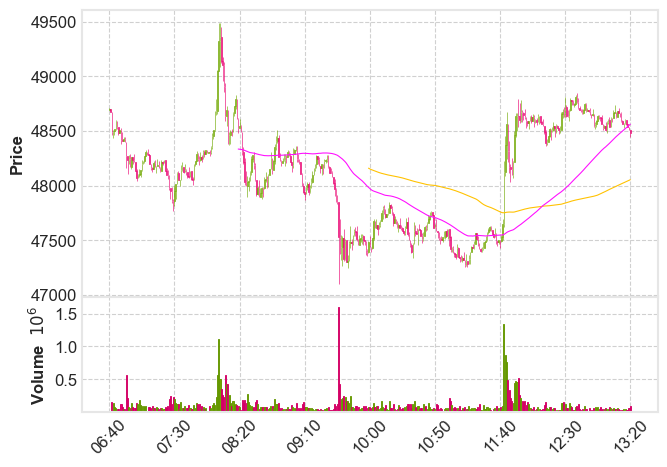

In [4]:
mpf.plot(df["2021-12-06 06:40":"2021-12-06 13:20"], type='candle', mav=(200, 100), volume=True, style='binance')

In [5]:
# daily vol, reindexed to close 

def get_daily_volatility(close, span0=100):
    df0 = close.index.searchsorted(close.index-pd.Timedelta(days=1))
    df0 = df0[df0>0]
    df0 = pd.Series(close.index[df0-1], index = close.index[close.shape[0]-df0.shape[0]:])
    df0 = close.loc[df0.index]/close.loc[df0.values].values-1
    df0 = df0.ewm(span=span0).std() 
    return df0

In [6]:
volatility_df = get_daily_volatility(df['close'], span0=100)

df['daily_volatility'] = volatility_df

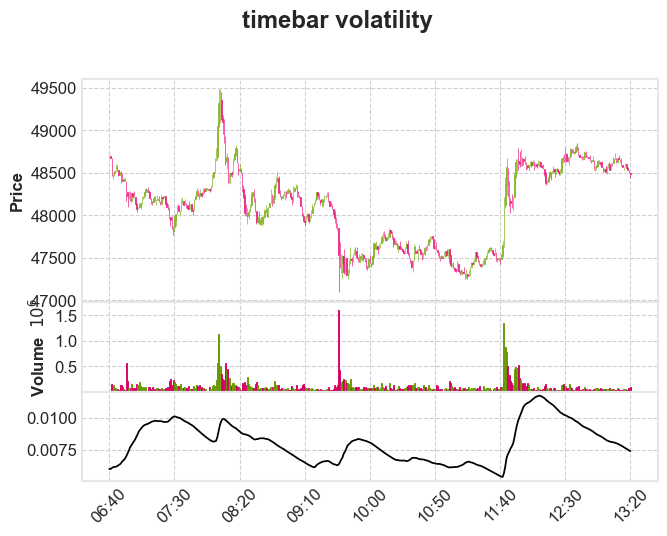

In [7]:
ap2 = [
    mpf.make_addplot(df["2021-12-06 06:40":"2021-12-06 13:20"]['daily_volatility'], color='black', panel=2)
    ]
mpf.plot(df["2021-12-06 06:40":"2021-12-06 13:20"], type='candle', title='timebar volatility', volume=True, style='binance', addplot=ap2)

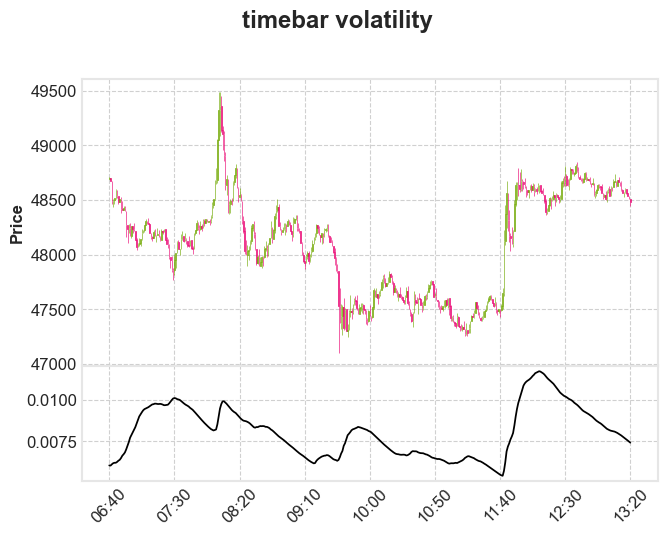

In [9]:
ap2 = [
    mpf.make_addplot(df["2021-12-06 06:40":"2021-12-06 13:20"]['daily_volatility'], color='black', panel=1)
    ]
mpf.plot(df["2021-12-06 06:40":"2021-12-06 13:20"], type='candle', title='timebar volatility', volume=False, style='binance', addplot=ap2)

In [10]:
def volume_bars(df, volume_column, m):
    t   = df[volume_column]
    ts  = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [31]:
volumebar_df = volume_bar_df(df, 'volume', 50_000)

volumebar_df

100%|██████████| 44640/44640 [00:00<00:00, 2507717.75it/s]


,open,high,low,close,volume,close_dt,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,col12,daily_volatility
datetime,,,,,,,,,,,,
2021-12-01 00:00:00,56995.7,57078.4,56898.1,56899.4,245564,1638316859999,431.053665,2938,96995,170.286070,0,NaN
2021-12-01 00:01:00,56899.4,56918.9,56738.7,56782.1,177135,1638316919999,311.651138,1878,67519,118.773453,0,NaN
2021-12-01 00:02:00,56782.1,56796.5,56702.6,56710.0,246997,1638316979999,435.188447,2671,123151,216.994648,0,NaN
2021-12-01 00:03:00,56710.8,56857.2,56695.1,56812.8,190718,1638317039999,335.919841,2368,117345,206.667562,0,NaN
2021-12-01 00:04:00,56812.7,56924.6,56802.8,56879.1,79294,1638317099999,139.399370,1232,41095,72.253166,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:40:00,46383.0,46408.6,46380.8,46408.6,6496,1640994059999,14.003359,195,6285,13.548442,0,0.004598
2021-12-31 23:44:00,46415.9,46486.8,46415.8,46456.8,35156,1640994299999,75.676398,807,22651,48.766213,0,0.004571
2021-12-31 23:50:00,46370.4,46370.4,46337.4,46337.4,14935,1640994659999,32.217924,284,2254,4.862655,0,0.004334


In [32]:
volumebar_volatility_df = get_daily_volatility(volumebar_df['close'], span0=100)
volumebar_df['daily_volatility'] = volumebar_volatility_df

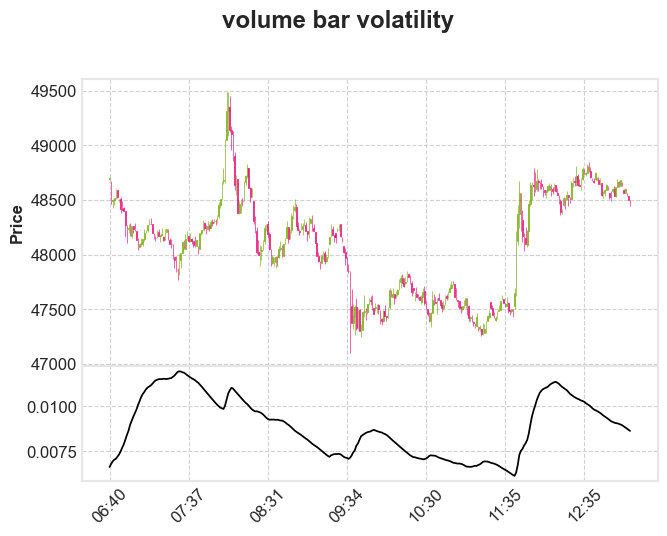

In [33]:
ap2 = [
    mpf.make_addplot(volumebar_df["2021-12-06 06:40":"2021-12-06 13:20"]['daily_volatility'], color='black', panel=1)
    ]
mpf.plot(volumebar_df["2021-12-06 06:40":"2021-12-06 13:20"], type='candle', title='volume bar volatility', volume=False, style='binance', addplot=ap2)

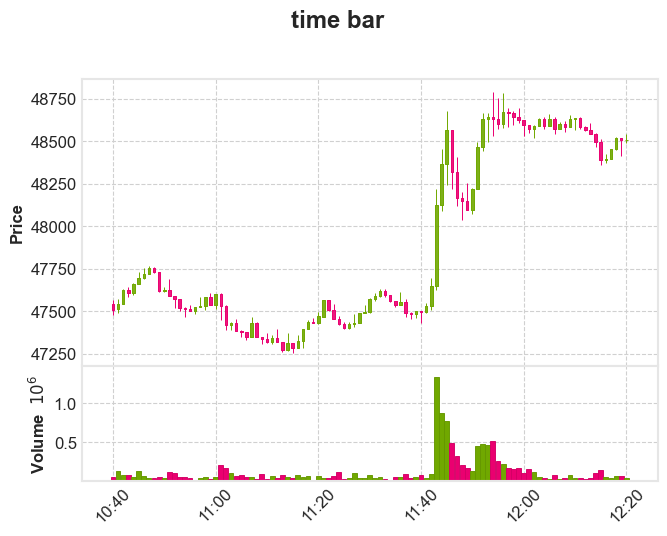

In [37]:
# time bars
mpf.plot(df["2021-12-06 10:40":"2021-12-06 12:20"], type='candle', title='time bar', volume=True, style='binance')

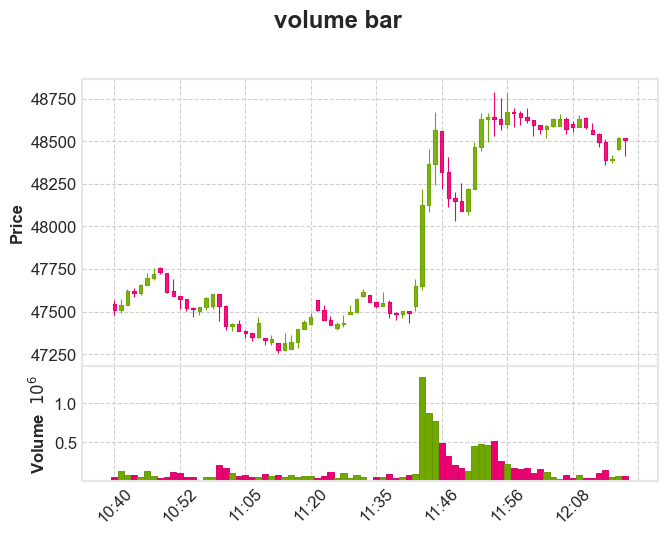

In [38]:
# volume bars
mpf.plot(volumebar_df["2021-12-06 10:40":"2021-12-06 12:20"], type='candle', title='volume bar', volume=True, style='binance')